# 相关性分析

In [2]:
import os
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("bmh")

读取数据

In [9]:
data_dir = "../data/yahoo"

# print(os.listdir(data_dir))

files = [f for f in os.listdir(data_dir) if f.endswith(".csv")]
assets = [f.split(".")[0] for f in files]
filepaths = [os.path.join(data_dir, f) for f in files]

def read_yahoo_ohlcv(filepath: str, asset: str) -> pd.DataFrame:
    df = pd.read_csv(filepath, index_col=0, parse_dates=True)
    df["asset"] = asset
    return df

data = pd.concat((read_yahoo_ohlcv(fp, a) for fp, a in zip(filepaths, assets)), axis=0)

In [11]:
data

,Open,High,Low,Close,Adj Close,Volume,asset
Date,,,,,,,
2000-08-30,4.650000,4.815000,4.630000,4.805000,4.805000,34954,Natural gas
2000-08-31,4.820000,4.870000,4.740000,4.780000,4.780000,25787,Natural gas
2000-09-01,4.750000,4.860000,4.750000,4.835000,4.835000,113,Natural gas
2000-09-05,4.850000,4.975000,4.840000,4.960000,4.960000,26096,Natural gas
2000-09-06,4.990000,5.110000,4.960000,5.065000,5.065000,32764,Natural gas
...,...,...,...,...,...,...,...
2024-05-08,78.339996,79.269997,76.889999,78.989998,78.989998,355449,Crude oil
2024-05-09,79.230003,79.800003,78.910004,79.260002,79.260002,272712,Crude oil
2024-05-10,79.589996,79.959999,78.139999,78.260002,78.260002,281169,Crude oil


数据预处理

- 将长格式数据框转化为宽格式，资产名称作为列索引。
- 处理缺失值，除了加密货币外所有多数资产在周末都没有交易，所以剔除周末数据，然后使用向前填充补充所有缺失值，这些缺失值往往是因为节假日休市等原因。

In [26]:
start_date = dt.datetime(2023, 1, 1)
end_date = dt.datetime.today()

prices = (
    data.pivot(columns="asset", values="Adj Close")
    .loc[start_date:end_date]
    .assign(weekday=lambda x: x.index.weekday)
    .query("weekday < 5")  # remove weekends, 0=monday, 4=friday
    .drop(columns="weekday")
    .ffill()
)

prices.tail()

asset,Bitcoin,CAC,Copper,Crude oil,DAX,ESTX50,EURUSD,Ethereum,FTSE100,GBPUSD,...,Natural gas,Nikkei225,Platinum,RBOB gasoline,SP500,SSE Composite,Silver,US 10-Year Bond,US 2-Year Bond,USDJPY
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-08,61187.941406,8131.410156,4.5620,78.989998,18498.380859,5038.169922,1.075049,2973.657227,8354.099609,1.250141,...,2.187,38202.371094,978.599976,2.5318,5187.669922,3128.479980,27.361000,105.648438,101.687500,154.748001
2024-05-09,63049.960938,8187.649902,4.6075,79.260002,18686.599609,5038.169922,1.074691,3036.020508,8381.400391,1.249328,...,2.301,38073.980469,984.700012,2.5418,5214.080078,3154.320068,28.132000,105.835938,101.753906,155.419006
2024-05-10,60792.777344,8219.139648,4.6935,78.260002,18772.849609,5085.080078,1.078516,2909.791260,8433.799805,1.252568,...,2.252,38229.109375,1001.099976,2.4997,5222.680176,3154.547119,28.275000,105.585938,101.636719,155.389008
2024-05-13,62901.449219,8209.280273,4.8045,79.120003,18742.220703,5078.959961,1.077041,2949.359619,8415.000000,1.252285,...,2.381,38179.460938,1005.299988,2.5105,5221.419922,3148.020996,28.221001,105.664062,101.656250,155.817993
2024-05-14,61770.941406,8214.030273,4.8535,78.940002,18719.630859,5076.620117,1.079797,2906.774902,8427.339844,1.255477,...,2.350,38356.058594,1015.299988,2.4902,5221.419922,3145.774414,28.605000,105.695312,101.683594,156.442993


相关系数矩阵

In [58]:
# 使用多少天的数据计算相关系数
corr_period = 90

corr = prices.tail(corr_period).corr()
# corr.style.background_gradient(cmap="coolwarm", axis=None).format("{:.1f}")

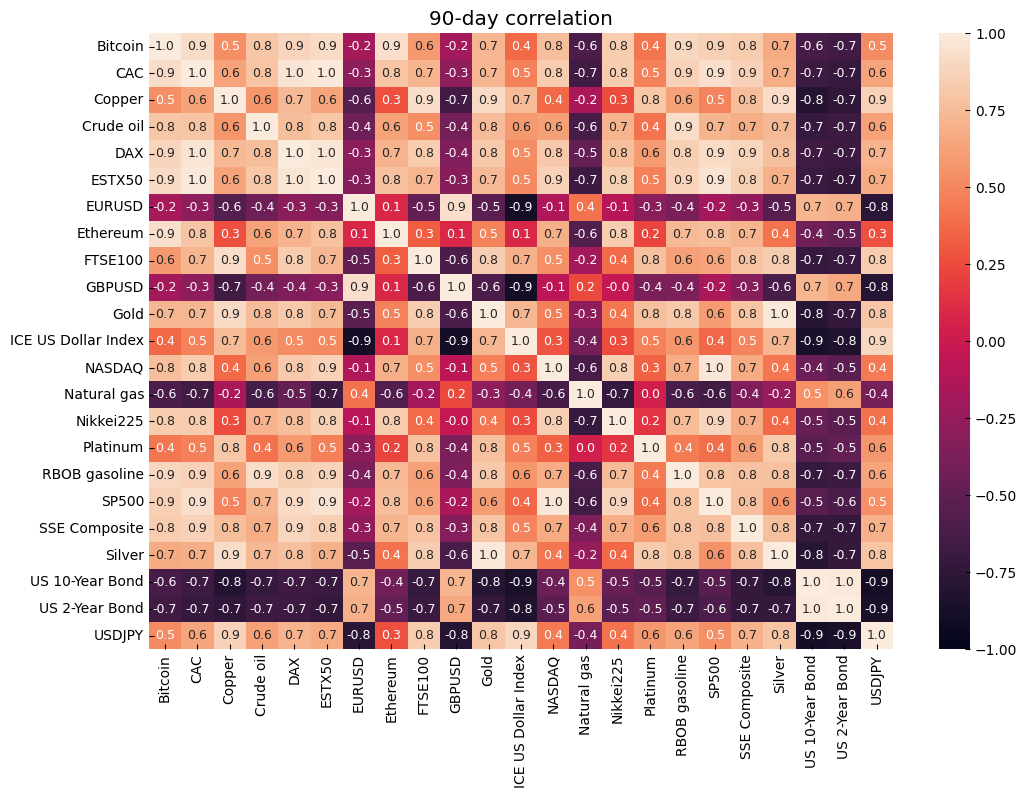

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.grid(False)  # remove grid
ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt=".1f", ax=ax, annot_kws={"size": 9})
_ = ax.set(title=f"{corr_period}-day correlation", xlabel="", ylabel="")

滚动相关系数

In [47]:
# 参数
window = 90  # 滚动相关系数窗口
base_asset = "Bitcoin"  # 研究目标，计算该资产与其它资产的滚动相关系数
corr_assets = [
    "SP500",
    "NASDAQ",
    "ICE US Dollar Index",
    "US 10-Year Bond",
    "Crude oil",
]  # 相关资产

idx_slice = pd.IndexSlice
rolling_corr = (
    prices.rolling(window)
    .corr()
    .loc[idx_slice[:, base_asset], corr_assets]
    .reset_index(level="asset", drop=True)
    .dropna()
)

rolling_corr

asset,SP500,NASDAQ,ICE US Dollar Index,US 10-Year Bond,Crude oil
Date,,,,,
2023-05-08,0.593781,0.844498,-0.536955,0.433486,-0.090766
2023-05-09,0.573107,0.836220,-0.527808,0.433977,-0.096250
2023-05-10,0.553875,0.825982,-0.521800,0.440773,-0.130650
2023-05-11,0.523928,0.812681,-0.500970,0.442842,-0.161162
2023-05-12,0.503453,0.796784,-0.494828,0.461453,-0.191387
...,...,...,...,...,...
2024-05-08,0.860095,0.759870,0.415059,-0.645371,0.811191
2024-05-09,0.860751,0.760925,0.404886,-0.640202,0.806680
2024-05-10,0.858810,0.760640,0.391627,-0.633109,0.801895


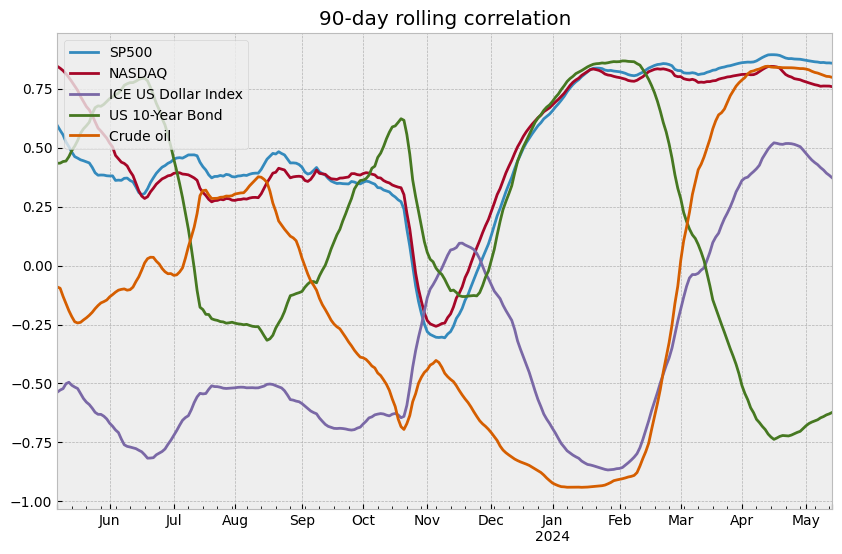

In [56]:
ax = rolling_corr.plot(figsize=(10, 6.18), title=f"{window}-day rolling correlation", xlabel="", ylabel="")
_ = ax.legend(loc='upper left')